<a href="https://colab.research.google.com/github/josehelioaraujo/FiapPosTechChallengeFase1_Preview/blob/main/Fiap_PosTech_IADT_HelioAndrade_Challenge_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   
# Desafio Fase I - Modelo Preditivo de Custo de Seguro de Saúde

**Aluno**

RM 355027 - José Hélio Araújo Andrade



# Introdução


Este projeto tem como objetivo a solução de um problema de um modelo preditivo de custo de seguro de saúde, relacionado ao **Tech Challenge Fase 1**, do curso de **Pós Gradução de IA para Devs** da **Fiap**.



# Definição do Problema
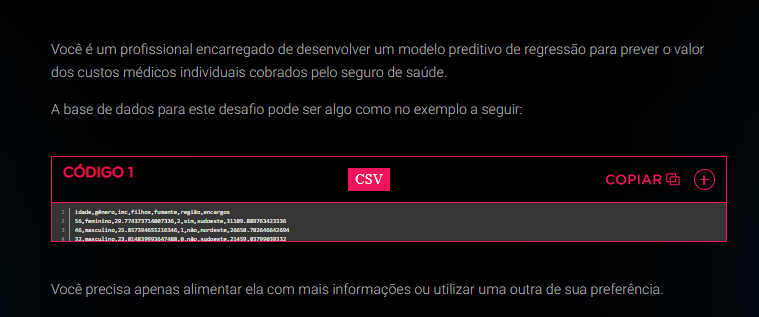

# Tarefas
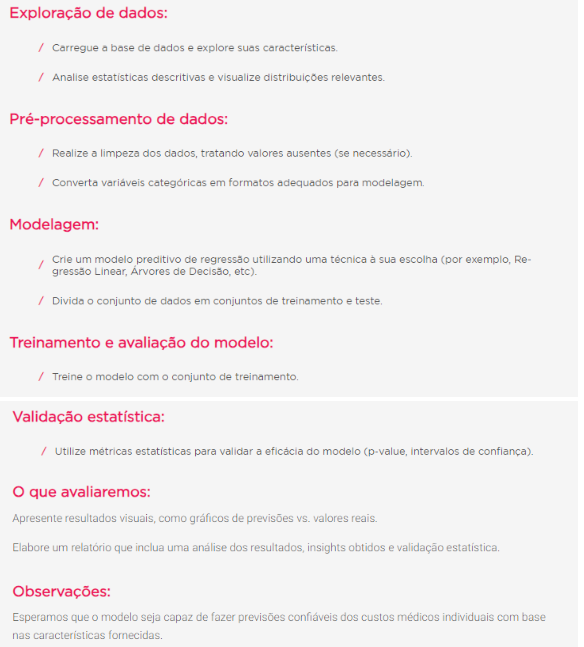


# Solução Implementada


## Seção 1 - Exploração de dados
- Carregue a base de dados e explore suas características
Usaremos as bibliotecas numpy,pandas, matplotlib,seaborn e sklearn

- Analise estatísticas descritivas e visualize distribuições revelantes

## Seção 2 - Coleta de dados
- carregando os dados do arquivo csv para um DataFrame do Pandas
 - exibindo nomes das colunas do datase
 - primeiras 5 linhas do dataframe
 - obtendo número de linhas e colunas - existem 1138 linhas e 7 colunas
 - obtendo informações dos data type do conjunto de dados
 - As variáveis categóricas são: sex, smoker e region
 - verificando valores ausentes, e observa-se que não existem
 - verificando se existem linhas duplicadas, e observa-se que existe uma linha
 - removendo linhas duplicadas, e observa-se que agora existem 1337 linhas

## Seção 3 - Análise de dados

## Seção 4 - Pré-processamento de dados

## Seção 5 - Treinamento e avaliação do modelo

## Seção 6 - Validação estatística(opcional)

## Seção 7 - Conclusões

## Seçao 8 - Referências e créditos




In [121]:
# 1 - Exploração de dados
# 1.1 Carregue a base de dados e explore suas características
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

sns.set_style("darkgrid")
import warnings
warnings.simplefilter(action='ignore')


Seção 2 - Coleta e análise de dados

**Observações:**

[Dataset obtido da plataforma Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)


In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# carregando os dados do arquivo csv para um DataFrame do Pandas
# Dataset obtido da plataforma Kaggle
# https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv
insurance_dataset = pd.read_csv('/content/insurance.csv')
dataset_original = insurance_dataset

In [124]:
# exibindo nomes das colunas do dataset
print(insurance_dataset.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [125]:
# primeiras 5 linhas do dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
# Existem 3 variáveis catégoricas(não numéricas): sex, smoker, region
print("Sex: ", set(insurance_dataset["sex"]))
print("Smoker: ", set(insurance_dataset["smoker"]))
print("Region: ", set(insurance_dataset["region"]))

Sex:  {'female', 'male'}
Smoker:  {'yes', 'no'}
Region:  {'southwest', 'southeast', 'northeast', 'northwest'}


In [127]:
# obtendo número de linhas e colunas - existem 1138 linhas e 7 colunas
insurance_dataset.shape

(1338, 7)

In [128]:
# obtendo informações dos data type do conjunto de dados
# Existem 1338 linhas com 3 variáveis categóricas(não numéricas) que são: sex, smoker e region
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [129]:
# Oserva-se que não existem dados nulos
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
# verificando linhas duplicadas, observa-se que existe uma linha
insurance_dataset.duplicated().sum()

1

In [131]:
# exibindo linhas duplicadas
insurance_dataset[insurance_dataset.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


- Observa-se que as linhas 195 e 581 estão duplicadas

In [132]:
# confirmando as linhas duplicadas, após a remoção, e observa-se que não existem mais
insurance_dataset.duplicated().sum()

1

In [133]:
# removendo linhas duplicadas, e observa-se que agora existem 1337 linhas

insurance_dataset.drop_duplicates(inplace=True)

print(insurance_dataset)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


**Informações do dataset:**

- 1337 linhas com 7 colunas(foi removida uma linha)

- Não existem colunas vazias

- Existem uma linha duplicada

- Existem 3 variáveis que não são numéricas(sexo, fumante e regiao)

## Seção 2 - Análise de dados

In [134]:
# exibindo as medidas estatísticas do dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observa-se, considerando as  medidas estatísticas apresentação, podemos constatar que:

- Idade - Distribuição se concentra entre 18 e 64 anos, com idade média de 39 anos, com idade mínima de 18 e máxima de 64 anos)

- IMC - Índice de massa corporal Distribuição entre 15.96 e 53.13, com média de 30.66(obesidade grau I, ver tabela abaixo). O que justifica, pois o dataset é de uma população dos Estados Unidos, que são os paises que tem uma média muito alta de pessoas obesas)

- Filhos - Observa-se mais concentração em 0(não tem filhos), a média tem apenas um filho, e um máximo de 5 filhos.

- Encargos(variável target) - Observa-se uma média de encargos de cerca de 13 mil dólares, distribuidas entre 1.120 e 63 mil dólares

  
### Observações:
Marcadores de Índice de Massa Corporal (IMC), adotada pela OMS:
  
- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- peso normal (enre 18.5 e 24.9)
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).

In [135]:
# exibindo quantidade de pessoas por idade
insurance_dataset['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

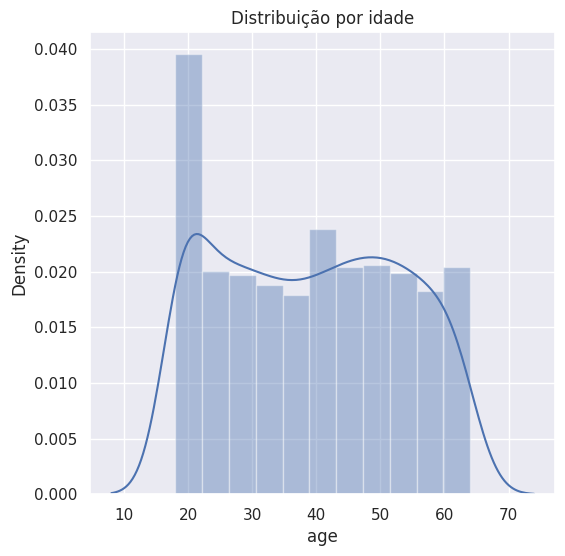

In [136]:
# distribuição por idade
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Distribuição por idade')
plt.show()



Observa-se que
- A distribuição se concentra entre 18 e 64 anos, com idade média de 39 anos, com idade mínima de 18 e máxima de 64 anos)

In [137]:
# exibindo quantidade de pessoas por filhos
insurance_dataset['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

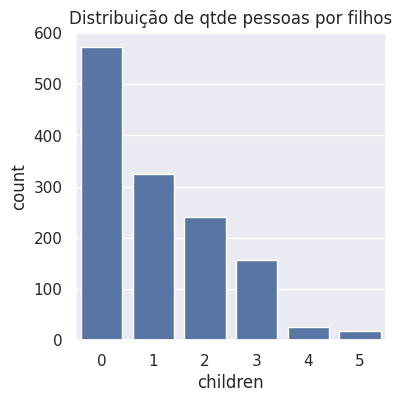

In [138]:
# exibindo gráfico de distribuição de qtde pessoas por filhos
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Distribuição de qtde pessoas por filhos')
plt.show()

Observa-se que:
- Maior concentração em 0(não tem filhos), e quantidades bem menores de 4 e 5  e um máximo de 5 filhos.

In [139]:
# exibe gráfico pizza de distribução por quantidadede de filhos
import plotly.express as px
pie = dataset_original["children"].value_counts()
children = pie.index
population = pie.values

fig = px.pie(dataset_original, values=population, names=children)
fig.show()

In [140]:
# exibindo quantidade de pessoas por sexo
insurance_dataset['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

Observa-se, visualizando os gráficos countplot e pie, numa população de 1337 pessoas:

- A maioria das pessoas não possui filhos(573 pessoas) - 42.9%
- 324 pessoas tem 1 único filho- 24.2%
- 240 pessoas tem 2 filhos - 17.9%
- 157 pessoas tem 3 filhos - 11.7%
- 25 tem 4 filhos - 1.87%
- E apenas 18 pessoas tem 5 filhos - 1.35%

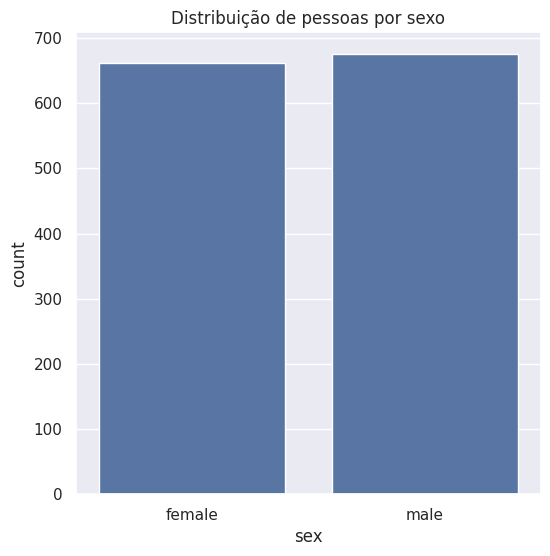

In [141]:
# distribuição de quantidade de pessoas por sexo
plt.figure(figsize=(6,6))
sns.countplot(x='sex',  data=insurance_dataset)
plt.title('Distribuição de pessoas por sexo')
plt.show()

In [142]:
# exibindo quantidade de pessoas por IMC
insurance_dataset['bmi'].value_counts()

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

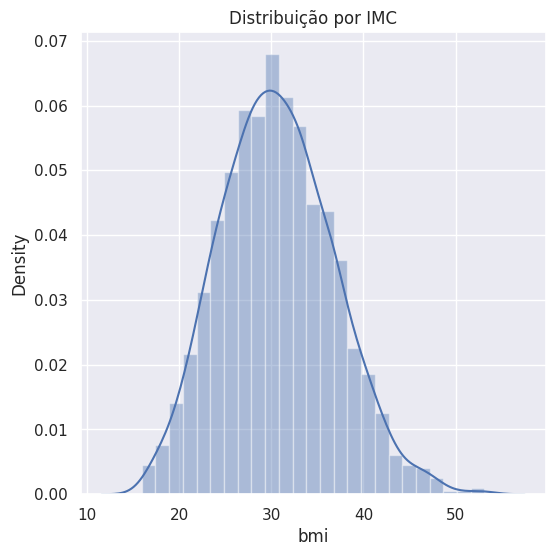

In [143]:
# distribuição por IMC - Indíce por Massa Corporal
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribuição por IMC')
plt.show()


IMC- Índice de massa corporal

 Distribuição entre 15.94 e 53.1, com média de 30.66(que é obesidade grau I, conformetabela de marcadores do IMC adotada pela OMC, exibida abaixo)

Marcadores do IMC são:

- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- peso normal (enre 18.5 e 24.9)
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).



In [144]:
# exibindo quantidade de pessoas fumantes

insurance_dataset['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

Observa-se, a maioria das pessoas não tem o hábito de fumar, ou seja, cerca de 79.5% não são fumantes.

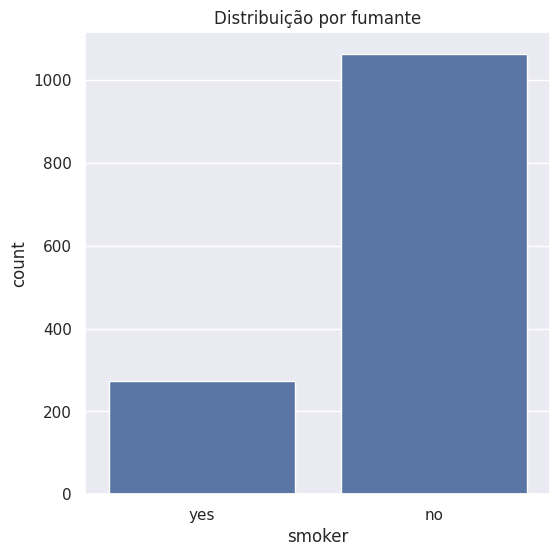

In [145]:
# distribuição por fumante
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Distribuição por fumante')
plt.show()

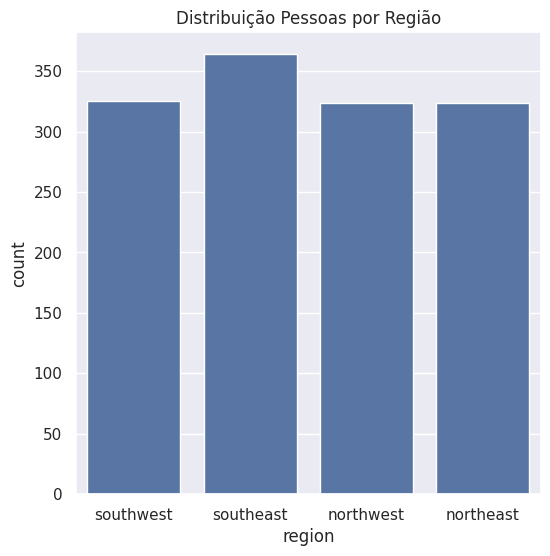

In [146]:
# distribuição de pessoas por região

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Distribuição Pessoas por Região')
plt.show()

In [147]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [148]:
# exibe gráfico pizza de distribução por região
# onde southeast:0,   southwest:1,   northeast:2, northwest:3

import plotly.express as px
pie = dataset_original["region"].value_counts()
regions = pie.index
population = pie.values

fig = px.pie(dataset_original, values=population, names=regions)
fig.show()

Observa-se, que a distribuição equilibrada das pessoas por região, sendo a região southeast com quantidade levemente superior.

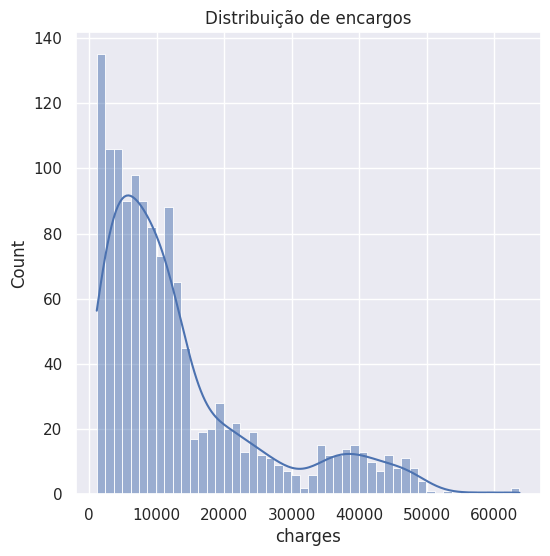

In [149]:

# exibe gráfico histograma de distribuição  dos valores de encargos ou custo
plt.figure(figsize=(6,6))
sns.histplot(data=insurance_dataset, x='charges', bins=50 ,kde=True);
plt.title('Distribuição de encargos')
plt.show()

### Exibindo gráficos de distribuição das variáves versus Encargos(charges)

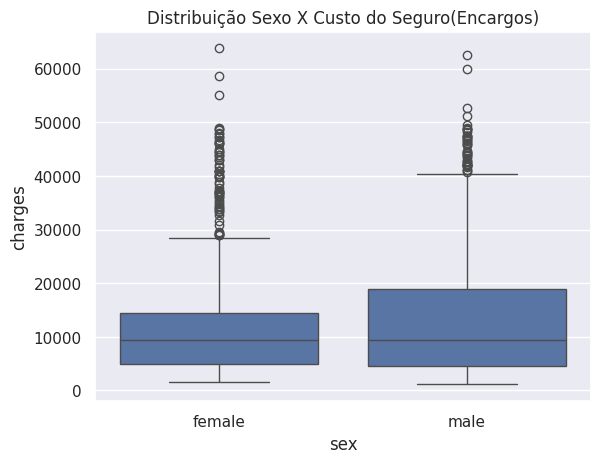

In [150]:
# Gráfico de distrbuição Sexo X Custo do Seguro(encarfos)
sns.boxplot(insurance_dataset, x='sex', y='charges')
plt.title('Distribuição Sexo X Custo do Seguro(Encargos)');

In [151]:
# exibindo média de encargos por sexo
insurance_dataset.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

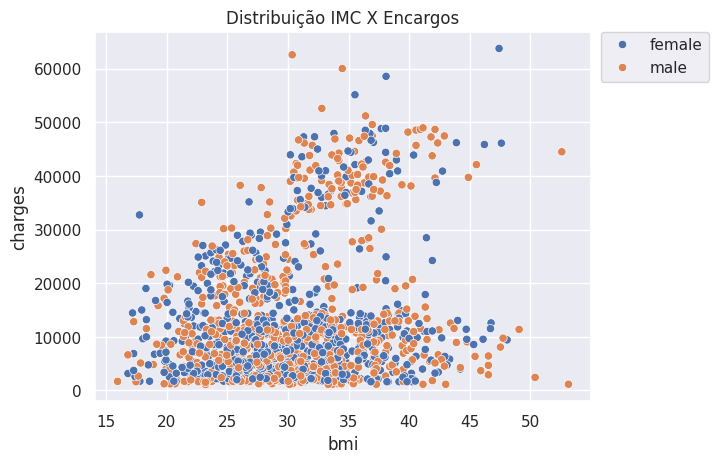

In [152]:
# Gráfico scatter IMC X Encargos
sns.scatterplot(data=insurance_dataset, x='bmi', y='charges', hue='sex')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Distribuição IMC X Encargos');

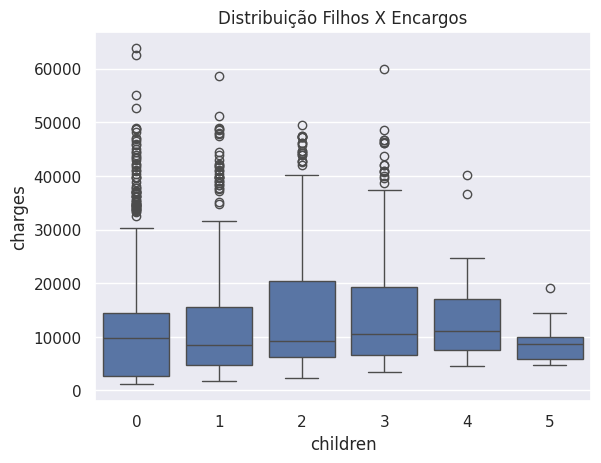

In [153]:
#  Gráfico Distribuição Filhos X Encargos
sns.boxplot(data=insurance_dataset, x='children', y='charges');
plt.title('Distribuição Filhos X Encargos');

In [154]:
# exibe quantidade de fumantes ou não
insurance_dataset.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

### Analisar estatísticas descritivas e visualizar distribuições relevantes

## Seção 3 - Pré-processamento de dados

In [155]:
# Importação de libs de exibição de gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

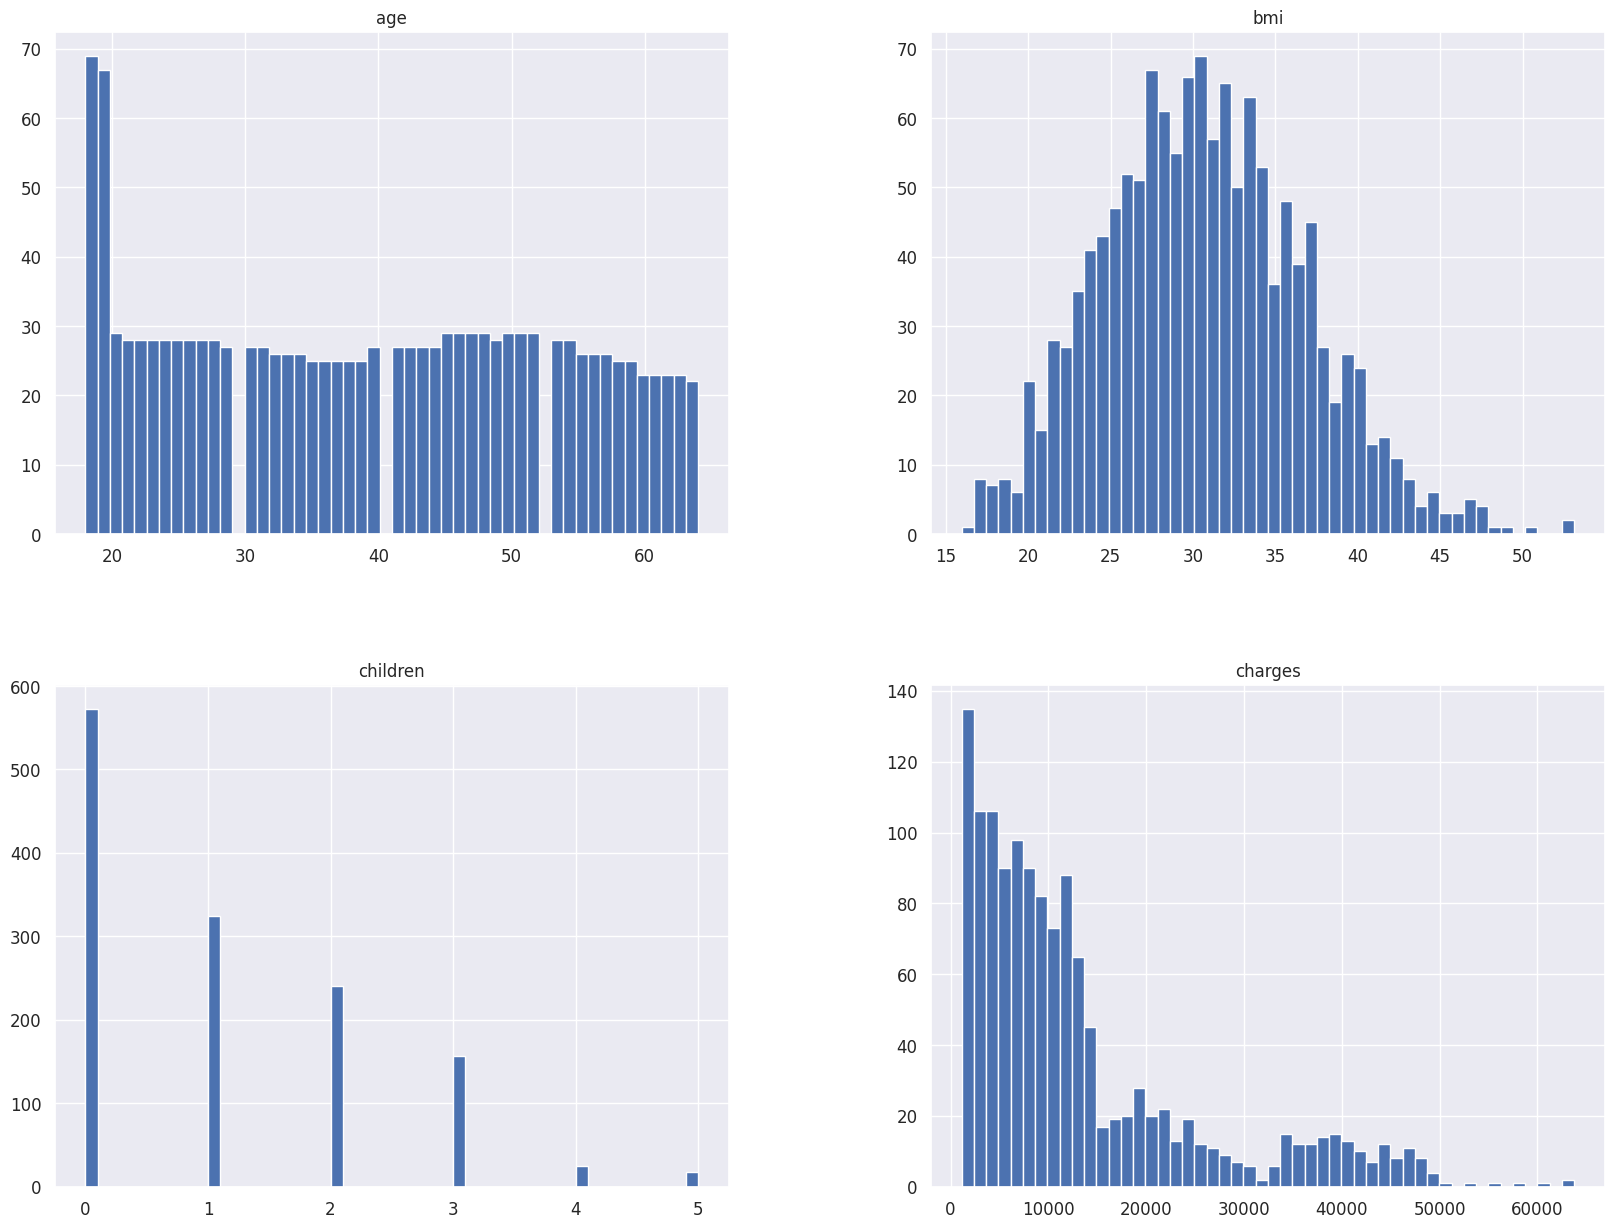

In [156]:
# Visualização do gráfico histograma dos dados do dataset
insurance_dataset.hist(bins=50, figsize=(20,15))


**Observando os gráficos, conforme as variáveis:**

- Idade - Distribuição se concentra entre 18 e 64 anos, com idade média de 19 anos

- IMC- Índice de massa corporal Distribuição entre 15.94 e 53.1, com média de 30.66(que é obesidade grau I, conformetabela de marcadores do IMC adotada pela OMC, exibida abaixo)

- Filhos - Observa-se mais concentração em 0(ou seja, a maioria das pessoas, não tem filhos), já que a média de idade é de 19 anos, e um máximo de 5 filhos.

- Encargos(variável target) - Observa-se uma média de encargos de cerca de 10 mil dólares, distribuidas entre 1.100 e 63 mil dólares

#### Observações:
O Índice de Massa Corporal (IMC) é uma das principais ferramentas, adotada inclusive pela Organização Mundial de Saúde (OMS), para calcular o chamado “peso ideal”.

Os outros marcadores do IMC são:
- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- peso normal (enre 18.5 e 24.9)
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).



In [157]:
#  variáveis categóricas em formatos numéricos

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


## normalizando a base de dados

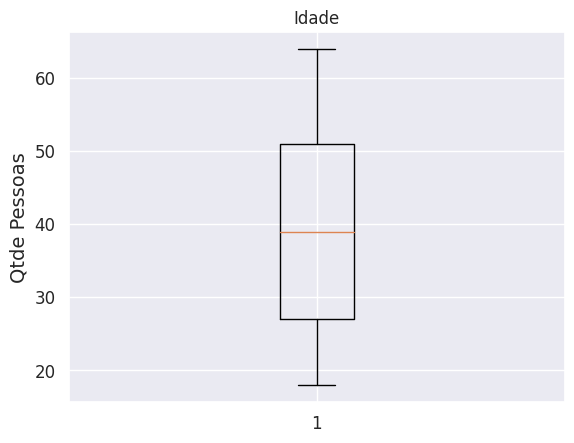

In [158]:
# Exibir gráfico boxplot Qtde pessoas x idade
plt.boxplot(insurance_dataset['age'])
plt.title('Idade')
plt.ylabel('Qtde Pessoas')
plt.show()

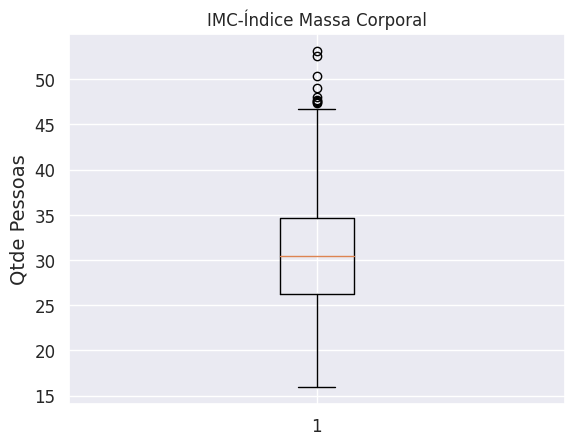

In [159]:
# Exibir gráfico boxplot Qtde Pessoas X IMC(Índice de massa corpórea)
plt.boxplot(insurance_dataset['bmi'])
plt.title('IMC-Índice Massa Corporal')
plt.ylabel('Qtde Pessoas')
plt.show()

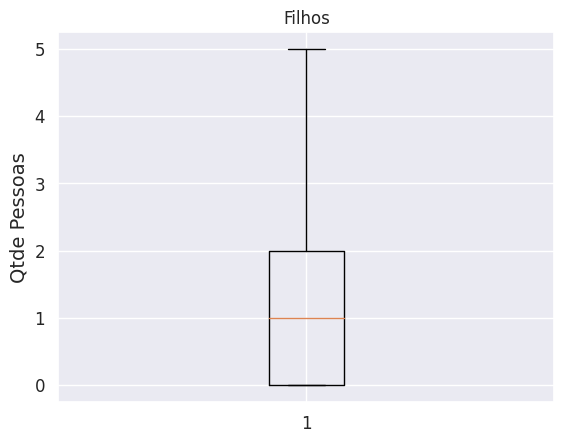

In [160]:
# Exibir gráfico boxplot Qtde Pessoas X Filhos
plt.boxplot(insurance_dataset['children'])
plt.title('Filhos')
plt.ylabel('Qtde Pessoas')
plt.show()

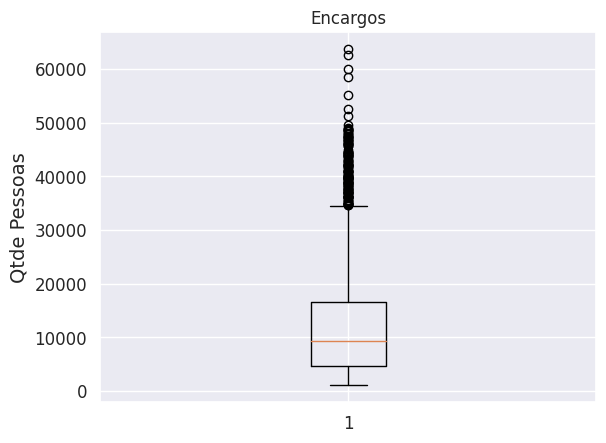

In [161]:
# Criar o gráfico  boxplot Qtde Pessoas X Encargos
plt.boxplot(insurance_dataset['charges'])
plt.title('Encargos')
plt.ylabel('Qtde Pessoas')
plt.show()

In [162]:
# Separando o dataset em variáveis categóricas e numéricas
dados_categoricos = insurance_dataset.select_dtypes(include=object).columns.tolist()
dados_numericos = insurance_dataset.select_dtypes(exclude=object).columns.tolist()

In [163]:
# Exibir correlação dos dados numéricos
matriz_correlacao = insurance_dataset[dados_numericos].corr()
matriz_correlacao



,age,bmi,children,smoker,region,charges
age,1.000000,0.109344,0.041536,-0.025587,0.001626,0.298308
bmi,0.109344,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.198401,0.067389,0.787234,-0.006547,1.000000


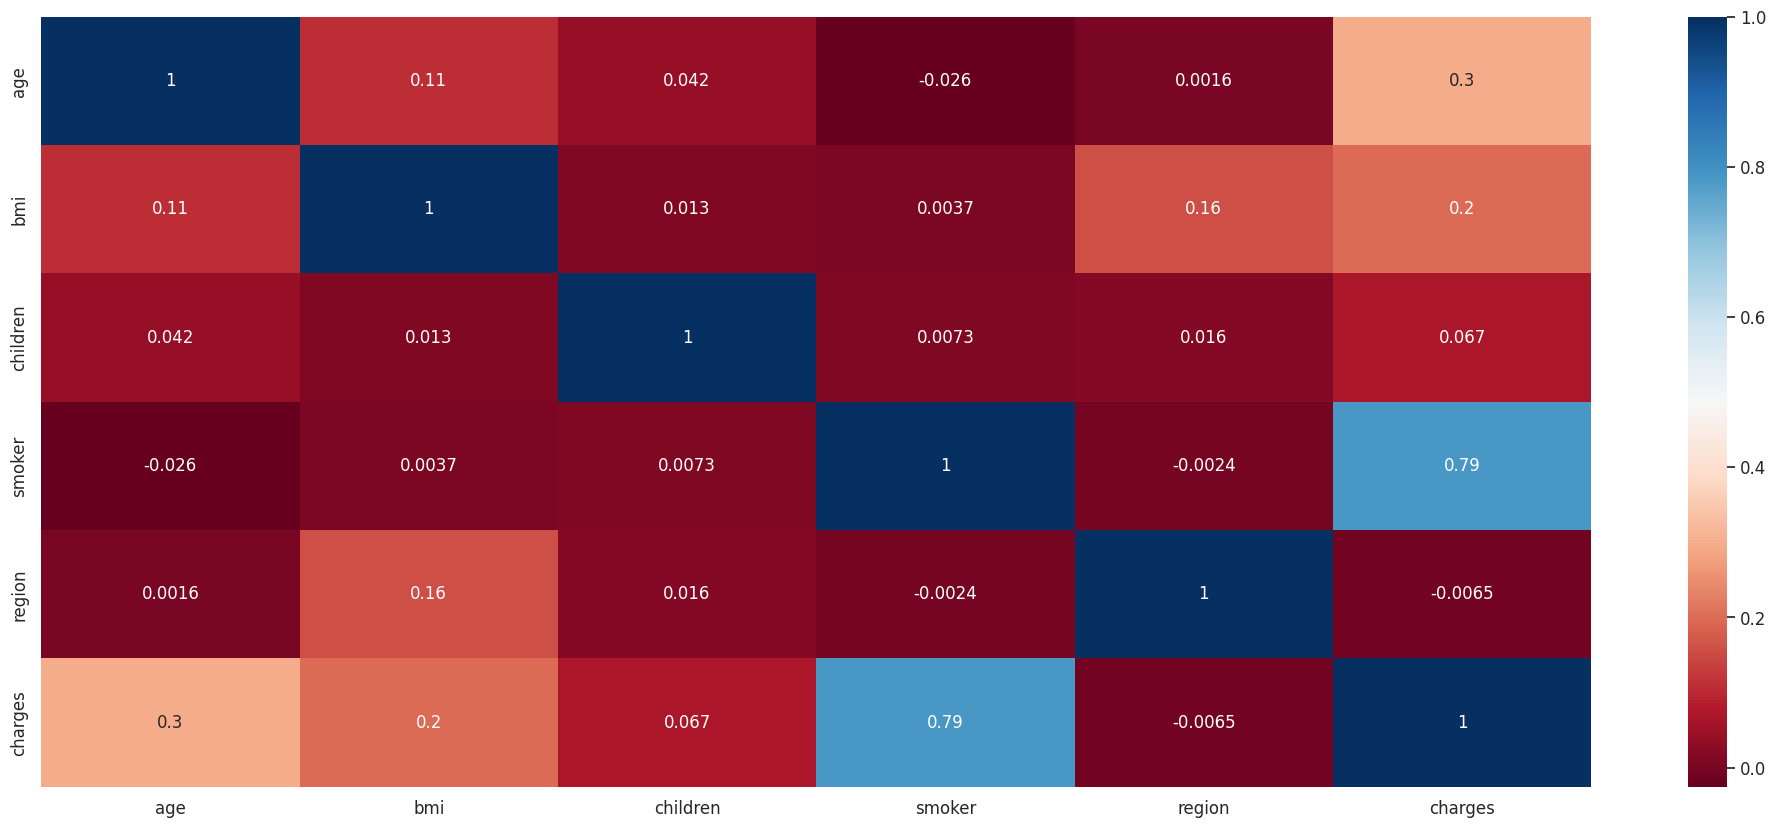

In [164]:
# Exibir gráfico da matriz de correlação

plt.figure(figsize = (25,10))
sns.heatmap(matriz_correlacao, annot = True, cmap="RdBu")
plt.show()

**Insights**
-  O mapa de calor mostra quais as varíaveis tem mais impacto com variável target(encargos).

-  Vamos consultar este mapa durante a construção do modelo linear, de modo a validar diferentes valores correlacionados junto com o intervalo de de confiança e p-value, para identificar a variável correta a ser selecionada/eliminada do modelo.

In [165]:
# Transformando as variáveis categóricas em númericas(sexo, fumante e região)
# usando o método one-hot encoding


# normalizando  a variável 'sexo',
insurance_dataset.replace({'sex':{'female':0,'male':1}}, inplace=True)

# normalizando a coluna 'fumante'
insurance_dataset.replace({'smoker':{'no':0,'yes':1}}, inplace=True)


# normalizando  a coluna 'região'
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [166]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Observa-se, que a distribuição equilibrada das pessoas por região, sendo a região southeast com quantidade levemente superior.

In [167]:
insurance_dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [168]:

# normalizando os dados, usando Labelencodee
label_encoder = LabelEncoder()

insurance_dataset['sex'] = label_encoder.fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Dividindo as variáveis features e target ou alvo (encargos)

In [169]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [170]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [171]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


Dividindo o dataset em dados de treinamento(80%) e teste(20%)

## Seção 4 - Treinamento de modelo

In [172]:
# dividindo o dataset em dados de treinamento(80%) e teste(20%)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=2)

In [173]:
print(X.shape, X_treino.shape, X_teste.shape)

(1337, 6) (1069, 6) (268, 6)


### 1 - Usando o modelo Regressão Linear

In [174]:
# carregando o modelo de regressão linear
regressor = LinearRegression()

In [175]:
# treinando o modelo de regressão linear
regressor.fit(X_treino, Y_treino)

LinearRegression()

**Avaliação do modelo de regressão linear **

In [176]:
# fazendo predição de treinamento do modelo de regressão linear
training_data_prediction =regressor.predict(X_treino)

In [177]:
# aplicando métrica rmse para o modelo de regressão linear
# Calcular o erro quadrático médio (RMSE)
rmse_treino = metrics.mean_squared_error(Y_treino, training_data_prediction, squared=False)


In [178]:
# aplicando métrica R squared
r2_treino = metrics.r2_score(Y_treino, training_data_prediction)


In [179]:
# fazendo predição usando os dados de teste
test_data_prediction =regressor.predict(X_teste)

In [180]:
# aplicando a métrica r2
r2_teste = metrics.r2_score(Y_teste, test_data_prediction)


In [181]:
# exibindo métricas rmse e r quadrado do modelo de regressão linear
print('rmse_treino:', rmse_treino)
print('r2_treino...:', r2_treino)

rmse_treino: 5924.66741843816
r2_treino...: 0.7586223702914746


### 2 - Usando o modelo random forest


In [182]:
# carregando o modelo de randon forest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()



In [183]:
# treinando com dados de treinamento do modelo randon forest
regressor_rf.fit(X_treino, Y_treino)

RandomForestRegressor()

In [184]:
# fazendo predição do modelo random forest usando os dados de teste
test_data_prediction_rf =regressor_rf.predict(X_teste)

In [185]:
# aplicando métrica r2 no modelo random forest
r2_rf_teste = metrics.r2_score(Y_teste, test_data_prediction_rf)
print('r2_teste_rf:', r2_rf_teste)

r2_teste_rf: 0.8307110153014088


### 3 - Usando o modelo Regressão XGBoost

In [186]:
# carregando o modelo XGBoost
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_treino, Y_treino)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [187]:
# fazendo predição do modelo XGBoost usando os dados de teste
y_predicao_xgb = regressor_xgb.predict(X_teste)

In [188]:
# aplicando a métrica r2 do modelo xgBoost
r2_xgb_teste = metrics.r2_score(Y_teste, y_predicao_xgb)
print('r2_teste_xgb:', r2_xgb_teste)

r2_teste_xgb: 0.8552006658684574


### Comparando os modelos treinados


### Comparação dos modelos usando a métrica R2


In [189]:
# Exibindo os resultados da métrica R2 para os 3 modelos treinados conforme os tipos utilizados
print('Resultados das métricas R2 para os modelos do tipo:')
print('+-------+------ -----------+--------------------+')
print('|Métrica|Tipo Modelo       | Valor              |')
print('|-------+------ -----------+--------------------+')
print('|R2     | Regressão Linear |', r2_teste, '|')
print('|R2     | Random Forest    |', r2_rf_teste,'|')
print('|R2     | XG Boost         |', r2_xgb_teste,'|')
print('|-------+------ -----------+--------------------+')




Resultados das métricas R2 para os modelos do tipo:
+-------+------ -----------+--------------------+
|Métrica|Tipo Modelo       | Valor              |
|-------+------ -----------+--------------------+
|R2     | Regressão Linear | 0.7164204424900908 |
|R2     | Random Forest    | 0.8307110153014088 |
|R2     | XG Boost         | 0.8552006658684574 |
|-------+------ -----------+--------------------+


## Seção 5 - Validação estatísticas(opcional)
- Observações:

  Este item está relacionado com o p-value e intervalo de confiança, que não foi abordados nas aulas da fase 1, e portanto, a prof. Ana Raquel falou na live de mentoria, que este imte não será obrigatório.

  No entanto, fiz a inclusão desta validação estatística, usando principalmente, a biblioteca StatsModel.




In [190]:
import statsmodels.formula.api as sm

# Conversão de variáveis categóricas em numéricas
dados_dummy = pd.get_dummies(dataset_original, columns=['sex', 'region'], drop_first=True)

print(dados_dummy)

# Construção do modelo utilizando statsmodels
model = sm.ols('charges ~ age + bmi + children + sex_1 + region_1 + region_2', data=dados_dummy).fit()

# Impressão dos resultados
print(model.summary())

      age     bmi  children  smoker      charges  sex_1  region_1  region_2  \
0      19  27.900         0       1  16884.92400  False     False     False   
1      18  33.770         1       0   1725.55230   True     False      True   
2      28  33.000         3       0   4449.46200   True     False      True   
3      33  22.705         0       0  21984.47061   True      True     False   
4      32  28.880         0       0   3866.85520   True      True     False   
...   ...     ...       ...     ...          ...    ...       ...       ...   
1333   50  30.970         3       0  10600.54830   True      True     False   
1334   18  31.920         0       0   2205.98080  False     False     False   
1335   18  36.850         0       0   1629.83350  False     False      True   
1336   21  25.800         0       0   2007.94500  False     False     False   
1337   61  29.070         0       1  29141.36030  False      True     False   

      region_3  
0         True  
1        False  


**Insights do Resultado da Regressão OLS:**

- O modelo de regressão linear (OLS) busca explicar as despesas com seguro saúde ("charges") com base em diversas variáveis.

Vamos analisar os insights a partir dos resultados fornecidos:

Variáveis Significativas:
- sex_1[T.True]:
 Ser do sexo masculino (assumindo que "True" represente masculino) está associado a uma redução média de $1326.93 nas despesas com seguro, mantendo as outras variáveis constantes.
 Essa diferença é estatisticamente significativa (p-valor = 0.033).

- age

  A idade tem um impacto positivo e significativo nas despesas. Cada ano adicional de idade aumenta a despesa média em $242.03 (p-valor < 0.001).

- **bmi**

 O índice de massa corporal (IMC) também tem um efeito positivo e significativo.
  Um aumento de 1 ponto no BMI está associado a um aumento de $306.82 nas despesas (p-valor < 0.001).

- **children**

 Ter filhos também está relacionado a maiores despesas com saúde. Cada filho adicional aumenta a despesa média em $539.93, sendo essa relação estatisticamente significativa (p-valor = 0.037).

**Variáveis Não Significativas:**

- region_1[T.True]:
  Pertencer à região 1 não apresenta um efeito estatisticamente significativo nas despesas com seguro (p-valor = 0.788).

- region_2[T.True]:

  Similarmente, pertencer à região 2 não demonstra um efeito significativo (p-valor = 0.242), embora o coeficiente seja positivo, sugerindo um possível aumento nas despesas.

- Qualidade do Modelo:

   - **R-squared (R²)** baixo (0.124):
    Isso significa que o modelo explica apenas 12.4% da variabilidade nas despesas com seguro.
     Os fatores incluídos no modelo não capturam a maior parte das variações nas despesas.

**- F-statistic significativo:**

    O teste F indica que o modelo como um todo é estatisticamente significativo (p-valor = 2.17e-35).

**Outras Observações:**

- **Alto valor de "Skewness" e "Kurtosis":**

   Indicam que os resíduos não seguem uma distribuição normal, o que pode afetar a confiabilidade dos testes de hipóteses.

- "**Cond. No." alto (305):**

   Sugere a possibilidade de multicolinearidade entre as variáveis independentes, o que pode prejudicar a precisão dos coeficientes estimados.

**Conclusões e Próximos Passos:**

  - O modelo fornece algumas informações valiosas sobre os
    fatores que influenciam as despesas com seguro saúde.
  
  

## Seção 6 - Conclusões
- Escolhemos o modelo de regressão, utilizando a técnica XG Boost, que foi o que teve mais acurácia, nas
medições realizadas, em comparação com os modelos de Regressão Linear e Random Forest.

- O modelo XG Boost adotado, nos permitiu analisar como as variáveis de entrada impactam o custo do seguro;

Conforme a métrica R2 aplicada para os modelos utilizados, o melhor modelo preditivo do valor do custo de seguro, é o modelo XG Boost, conforme tabela exibida abaixo:

- Regressão Linear - R2:  0.7447273869684076
- Random Forest - R2: 0.8370748848709408
- XG Boost - R2: 0.8662432902515654

- Com relação às métricas RMSE e R²

   Os coeficientes do modelo indicam a influência de cada variável no custo do seguro.
   - Um coeficiente positivo indica que o aumento do valor da variável está associado a um aumento no custo do seguro.
   - Um coeficiente negativo indica o inverso.
   
- RMSE:
   - O RMSE mede o erro médio do modelo em dólares. Um RMSE menor indica um modelo mais preciso.

- R²:

   O R² mede a proporção da variabilidade no custo do seguro que é explicada pelo modelo.

   Um R² obtido foi 0.86, o que indica um bom ajuste do modelo aos dados, porém deve-se evitar, o valor próximo de 1,  pois signica que o modelo
   está superajustado(overfit), ou seja, o modelo 'decorou' os dados, e a previsão não será confiável.


 - O modelo de regressão XG Boost obteve um desempenho moderado na previsão dos custos do seguro de saúde.

- As variáveis que mais impactaram os custos do seguro foram:
- Fumante:

  Fumantes têm custos de seguro significativamente maiores.


- Idade:
  Há uma correlação positiva entre idade e custo do seguro.


- IMC:

  A relação entre IMC e custo do seguro tem  grande impacto, ou seja, valores altos do IMC, tem aumento significativo no custo do serguro.

- Filhos

    O custo do seguro aumenta, se a quantidade de filhos aumenta também

- Demais variáveis
  Como sexo e região, parecem ter um impacto menor nos custos do seguro.
  
Insights baseado gráficos:

- **Histograma das idades**
  Permite analisar a distribuição das idades dos indivíduos no dataset.
    
- **Gráfico de dispersão entre IMC e custo**
  Permite visualizar a relação entre o IMC e o custo do seguro, geralmente uma relação positiva (maior IMC, maior custo).
    
- **Boxplot do custo do seguro por região**
   Podemos comparar a distribuição dos custos do seguro em diferentes regiões, identificando potenciais variações regionais.
    

Insights dos impacto das variáveis no custo do seguro:

- A análise dos coeficientes do modelo adotado, juntamente com os insights visuais dos gráficos, nos permite entender como as variáveis de entrada impactam o custo do seguro.
    
- Podemos analisar quais variáveis têm maior influência no custo (coeficientes com maior magnitude), e se essa influência é positiva ou negativa.
    
- As variáveis 'age', 'bmi' e 'children' geralmente têm coeficientes positivos, indicando que o aumento dessas variáveis está associado a um aumento no custo do seguro.
    
- A variável 'sex' pode ter um impacto, dependendo do dataset e da região.
    
- A variável 'region' pode ter um impacto significativo, como observado no boxplot.
    
**Em resumo**

 Os resultados específicos podem variar dependendo do dataset utilizado, que no nosso caso, foi um conjunto de dados pequeno com apenas 1337 linhas, mas em cenários reais, a quantidade de linhas no dataset seria bem maior, mas para fins acadêmicos o tamanho do dataset foi o suficiente para fazer a análise.
  


## Seção 7 - Testando o modelo construido usando um formulário simples

In [191]:
# função para calcular o custo do seguro conforme dados de entrada
# obtido do formalário com os dados(sexo, fumante, regiao, idade, imc e qtde de filhos)

import numpy as np

def prever_custo_seguro(regressor_xgb, age, gender, bmi, children, smoker, region):
  """
  Prediz o custo do seguro de saúde com base nos parâmetros fornecidos.

  Args:
    regressor_xgb: Modelo XGBoost treinado para prever o custo do seguro.
    age: Idade do indivíduo.
    gender: Sexo do indivíduo ('Male' ou 'Female').
    bmi: Índice de Massa Corporal (IMC) do indivíduo.
    children: Número de filhos do indivíduo.
    smoker: Se o indivíduo é fumante ('Yes' ou 'No').
    region: Região de residência do indivíduo ('Southeast', 'Southwest', 'Northeast', 'Northwest').

  Returns:
    Uma string representando o custo previsto do seguro em USD.
  """

  # Pré-processamento dos dados de entrada
  gender = 0 if gender == 'Female' else 1
  smoker = 1 if smoker == 'Yes' else 0
  region_mapping = {'Southeast': 0, 'Southwest': 1, 'NorthEast': 2, 'Northwest': 3}
  region = region_mapping.get(region, 3)  # Usa 3 como padrão se a região não for encontrada

  # Determinar o marcador de IMC
  marcador_imc = "Peso Normal"
  if bmi < 18.5:
    marcador_imc = "Magreza"
  elif bmi < 24.9:
    marcador_imc = "Peso normal"
  elif bmi < 29.9:
    marcador_imc = "Sobrepeso"
  else:
    marcador_imc = "Obesidade"

  # Preparar os dados para a predição
  input_data = (age, gender, bmi, children, smoker, region)
  input_data_array = np.asarray(input_data).reshape(1, -1)

  # Fazer a predição usando o modelo XGBoost
  prediction = regressor_xgb.predict(input_data_array)
  custo_seguro = str(prediction[0])

  # Imprimir os resultados
  print("Custo do segurado para os parâmetros abaixo:")
  print("Idade:", age)
  print("Sexo:", 'Feminino' if gender == 0 else 'Masculino')
  print("IMC:", bmi)
  print("Marcador IMC:", marcador_imc)
  print("Qtde Filhos:", children)
  print("Fumante:", 'Sim' if smoker == 1 else 'Não')
  print("Região:", region)

  return custo_seguro

In [201]:
# Formulário de entrada de dados: idade, sexo, imc, 'filhos', 'fumante', 'regiao'

gender  = 'Male' # @param ["Female", "Male" ]
smoker = "No" #@param ["Yes", "No"]
region = "Northwest" #@param ['Southeast','Southwest','Northwest','Northeast']
age = 17 # @param {type:"slider", min:5, max:80, step:1}
bmi = 19.9 # @param {type:"slider", min:10, max:50, step: 0.1}
children = 0 # @param {type:"slider", min:0, max:5, step:1}

custo = prever_custo_seguro(regressor_xgb,age,gender, bmi,children, smoker, region)

print('Custo Seguro (USD):', custo)

Custo do segurado para os parâmetros abaixo:
Idade: 17
Sexo: Masculino
IMC: 19.9
Marcador IMC: Peso normal
Qtde Filhos: 0
Fumante: Não
Região: 3
Custo Seguro (USD): 2143.599


## Seção 8 - Referências e Créditos


Fontes:

[Conjunto de dados insurance.csv obtido do Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

[O que é IMC Definição do Índice Massa Corpórea e para que serve](https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/noticias/?p=332991)

O Índice de Massa Corporal (IMC) é uma das principais ferramentas, adotada inclusive pela Organização Mundial de Saúde (OMS), para calcular o chamado “peso ideal”.

Obtido a partir do peso e da altura do indivíduo, o IMC também aponta níveis de magreza e obesidade, que são usados para nortear o trabalho de profissionais de saúde e de educadores físicos.

Para obter o IMC, basta dividir o seu peso (em quilos) pela altura (em metros) elevada ao quadrado (altura x altura).

De acordo com o indicador, o peso considerado saudável é aquele situado entre 18,5 e 24,9.

Os outros marcadores do IMC são:

- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).

 .

